## Labwork 1 | Affine transformations. Homogeneous coordinates.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def plot(*shapes,
                size=6,
                lim=15,
                major=5,
                with_points=True,
                point_size=5,
                **common_plot_kw):
    fig, ax = plt.subplots(figsize=(size, size))

    for item in shapes:
        if isinstance(item, tuple):
            shape, plot_kw = item
        else:
            shape, plot_kw = item, {}

        shape = np.asarray(shape)
        x = shape[:, 0] / shape[:, 2]
        y = shape[:, 1] / shape[:, 2]

        xx = np.append(x, x[0])
        yy = np.append(y, y[0])

        ax.plot(xx, yy, **({"linewidth": 1.6} | common_plot_kw | plot_kw))

        if with_points:
            ax.scatter(x, y, s=point_size, zorder=3)

    ax.set_aspect("equal")
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    major_ticks = np.arange(-lim, lim + 1, major)
    minor_ticks = np.arange(-lim, lim + 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="major", linestyle="-", linewidth=0.8)
    ax.grid(which="minor", linestyle=":", linewidth=0.5)

    plt.show()


### Task 1 | Triangle transformation

Найдите аффинное преобразование ℱ (композицию элементарных
преобразований), при котором образом квадрата будет параллелограмм 𝐴𝐵𝐶𝐷,
причем

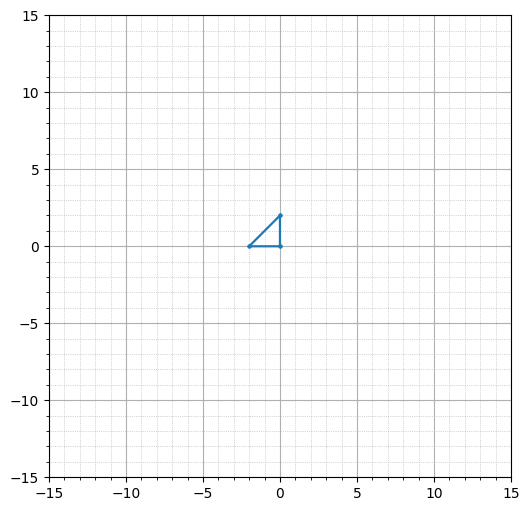

In [39]:
# x1, y1, w
# x2, y2, w
# x3, y3, w
  
A = np.array([[-2, 0, 1], 
              [0, 2, 1], 
              [0, 0, 1]])

plot(A)

b. Задайте параметры следующих преобразований:

- вектор $\vec\alpha$ для переноса $T_{\vec\alpha}$
- угол $\phi$ для поворота $R_{С}^{\phi}$ относительно центра треугольника $С$
- прямую $l$ для осевой симметрии $S_l$
- коэффициент $k$ для гомотетии $H_{O}^k$ относительно начала координат $O$
- коэффицент $m$ для гомотетии $H_{M}^m$, где $M$ — серидина наименьшей стороны треугольника

Составьте матрицы всех преобразований в однородных координатах и умножением на матрицу вершин найдите образы треугольника при: $T_{\vec\alpha}, R_{C}^{\phi}, S_l \circ H_{O}^{k}, H_{M}^{m} \circ R^{\pi}_{M}$

_Что такое композиция? что такое гомотетия? что такое осевая симметрия?_

Композиция — операция, которая позволяет объединить несколько преобразований в одно. Например, $S_l \circ H_{O}^{k}$ — композиция симметрии $S_l$ и гомотетии $H_{O}^k$.

Гомотетия — преобразование, которое изменяет размер объекта. Например, $H_{O}^k$ — гомотетия относительно начала координат $O$, где $k$ — коеффициент.

Осевая симметрия — преобразование, которое переворачивает объект относительно оси. Например, $S_l$ — осевая симметрия относительно прямой $l$.

Как перенести объект на вектор $\vec\alpha$? Умножить на матрицу переноса $T_{\vec\alpha}$. А что такое матрица переноса?

Матрица переноса — матрица, которая перемещает объект на вектор $\vec\alpha$. Например, $T_{\vec\alpha} = \begin{bmatrix} 1 & 0 & \alpha_x \\ 0 & 1 & \alpha_y \\ 0 & 0 & 1 \end{bmatrix}$

Как повернуть объект на угол $\phi$? Умножить на матрицу поворота $R_{C}^{\phi}$. А что такое матрица поворота?

c. Постройте треугольник и все найденные образы.

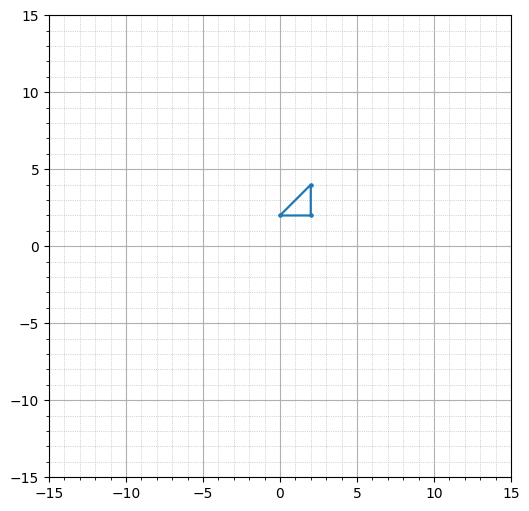

In [40]:
alpha_vec = np.array([[1, 0, 2],
                      [0, 1, 2],
                      [0, 0, 1]])

transformed_A = A @ alpha_vec.T

plot(transformed_A)

So actually a rotation is around a specific origin is Transforming to that origin, rotating, then transforming back???

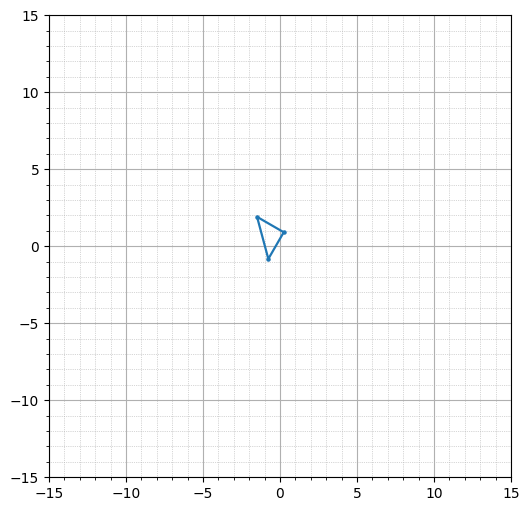

In [41]:
alpha = np.pi/3

R = np.array([[np.cos(alpha), -np.sin(alpha), 0],
              [np.sin(alpha),  np.cos(alpha), 0],
              [            0,              0, 1]])

cart = A[:, :2] / A[:, 2, None]
cx, cy = cart.mean(axis=0)

T_c      = np.array([[1, 0, cx],
                     [0, 1, cy],
                     [0, 0, 1]])

T_minus  = np.array([[1, 0, -cx],
                     [0, 1, -cy],
                     [0, 0,   1]])

P = T_c @ R @ T_minus

transformed_A = A @ P.T

plot(transformed_A)

$$l = ax + by + c; a = 0; b = 0; c = 2$$

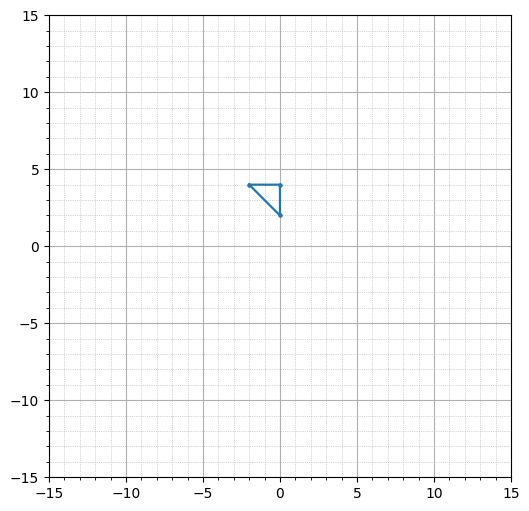

In [42]:
l = np.array([[-2, 2, 1],
              [2, 2,  1]])


x1, y1 = l[0][:2] / l[0][2]
x2, y2 = l[1][:2] / l[1][2]

# line coefficients  a x + b y + c = 0
a = y2 - y1
b = -(x2 - x1)
c = (x2 - x1)*y1 - (y2 - y1)*x1

r = np.hypot(a, b)
nx, ny = a / r, b / r

S = np.array([[1 - 2*nx*nx,    -2*nx*ny,   -2*nx*c/r],
              [   -2*nx*ny, 1 - 2*ny*ny,   -2*ny*c/r],
              [          0,           0,           1]])

plot(A @ S.T)

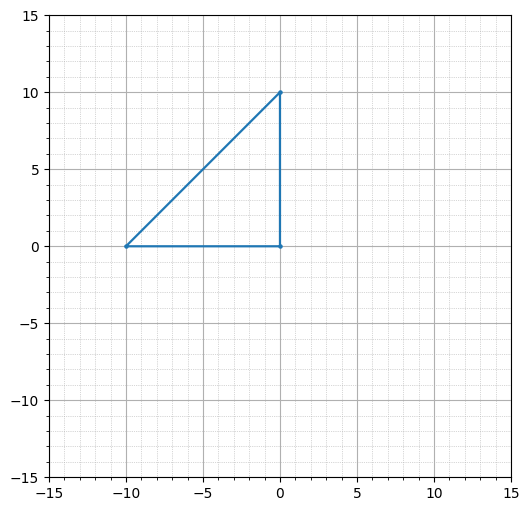

In [43]:
k = 5
H = np.array([[k, 0, 0],
              [0, k, 0],
              [0, 0, 1]])

plot(A @ H.T)

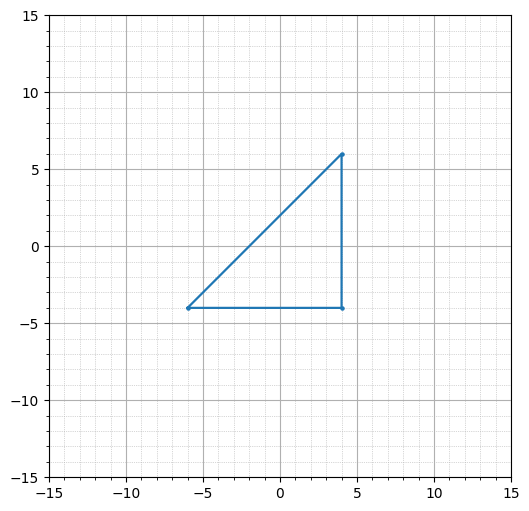

In [44]:
side = A[[0, 1],:2]
origin = (side[0] + side[1]) / 2

T_plus = np.array([[1, 0, origin[0]],
                   [0, 1, origin[1]],
                   [0, 0,         1]])

T_minus = np.array([[1, 0, -origin[0]],
                   [0, 1,  -origin[1]],
                   [0, 0,         1]])

H_m = T_plus @ H @ T_minus

plot(A @ H_m.T)

### Task 2 | Square transformation

Задайте квадрат 𝐾𝐿𝑀𝑁 декартовыми координатами его вершин. Составьте матрицу
однородных координат вершин квадрата.

Найдите аффинное преобразование $\mathcal{F}$ (композицию элементарных
преобразований), при котором образом квадрата будет параллелограмм $ABCD$,
причем

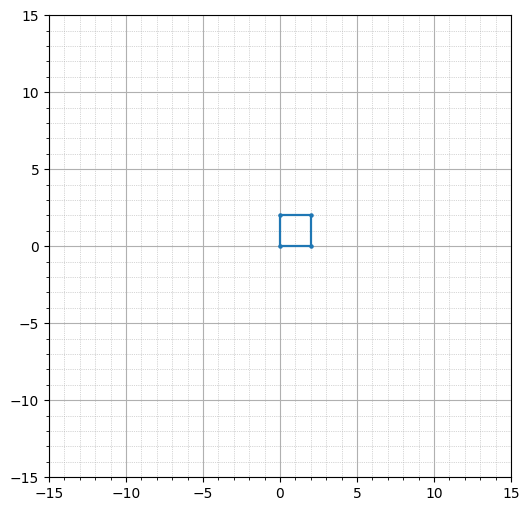

In [45]:
KLMN = np.array([[0, 0, 2],
                 [0, 2, 1],
                 [2, 2, 1],
                 [2, 0, 1]])

plot(KLMN)

вершина $A$ лежит на луче $KM$ и находится в три раза дальше от вершины $K$,
чем точка $M$;

$$
\vec{KM}=(2,2) \\
A = K + 3\vec{KM} \\
A = (0, 0) + (6,6) = (6, 6)
$$

образ стороны $KN$ ей параллелен и его длина в два раза больше $KN$;

$$
\vec{AD} = 2\cdot(0,1) = (0,2),\quad D = A + \vec{AD} = (3,5)
$$

Сдвиг по $y$ (shear), чтобы задать угол $\pi/3$ при вершине $A$.



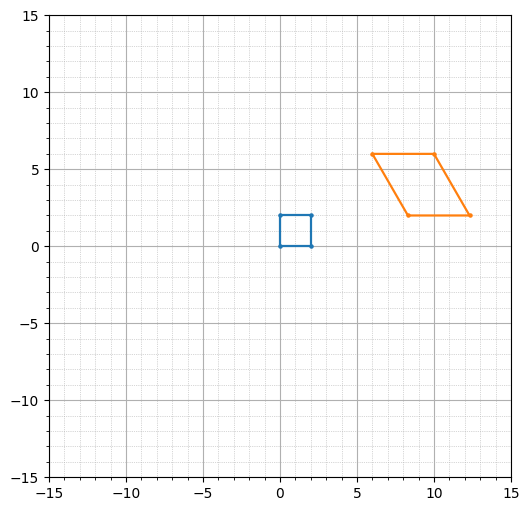

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [50]:
H = np.array([[2, 0, 0],
              [0, -2, 0],
              [0, 0, 1]])

S = np.array([[1, 1 / np.sqrt(3), 0],
              [0,              1, 0],
              [0,              0, 1]])

T = np.array([[1, 0, 6],
              [0, 1, 6],
              [0, 0, 1]])

F = T @ H @ S
F_inv = np.linalg.inv(F)

ABCD = KLMN @ F.T
ABCD_inv = ABCD @ F_inv.T

plot(ABCD_inv, ABCD)

ABCD = KLMN @ F.T
ABCD_inv = ABCD @ F_inv.T

print(KLMN - ABCD_inv)

